In [39]:
import pandas as pd


df_carwale = pd.read_csv("ev_reviews/4-wheeler-EV-carwale.csv")
df_cardekho = pd.read_csv("ev_reviews/4-wheeler-EV-cardekho.csv")
df_bikewale = pd.read_csv("ev_reviews/2-wheeler-EV-bikewale.csv")

df_carwale = df_carwale.rename(columns={"review": "Review", "model_name": "Model"})
df_cardekho = df_cardekho.rename(columns={"Review": "Review", "Model": "Model"})
df_bikewale = df_bikewale.rename(columns={"review": "Review", "Model Name": "Model"})

df_reviews = pd.concat([df_carwale[['Review', 'Model']], df_cardekho[['Review', 'Model']], df_bikewale[['Review', 'Model']]], ignore_index=True)
df_reviews.dropna(inplace=True)

df_market = pd.read_csv("global_ev/Global EV 2023.csv")


df_iea = pd.read_csv("iea_ev_data.csv")


print("Reviews:")
print(df_reviews.head())

print("\n Global Market Data:")
print(df_market.head())

print("\n IEA Data:")
print(df_iea.head())


Reviews:
                                              Review         Model
0  Superb car like as fantastic as petroleum car....  hyundai kona
1  Anti national, worst service, worst customer c...  hyundai kona
2           Super happy with it. The car is too good  hyundai kona
3  Pretty good car, smooth as a glider fast car, ...  hyundai kona
4  Price difference between petrol and electronic...  hyundai kona

 Global Market Data:
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical  EV stock share  Cars         EV  2011   percent   
3  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00650  
2    0.00046  
3   49.00000  
4  170.00000  

 IEA Data:
  

In [41]:

print(" Dataset Summary:")
df_reviews.info()


print("\n Missing values:")
print(df_reviews.isnull().sum())


df_reviews['Review Length'] = df_reviews['Review'].str.len()
print("\n Review Length Stats:")
print(df_reviews['Review Length'].describe())


print("\n Reviews per EV model:")
print(df_reviews['Model'].value_counts())

 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 0 to 1112
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review         1066 non-null   object
 1   Model          1066 non-null   object
 2   Review Length  1066 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.3+ KB

 Missing values:
Review           0
Model            0
Review Length    0
dtype: int64

 Review Length Stats:
count    1066.000000
mean      430.826454
std       409.966458
min        40.000000
25%       300.000000
50%       331.000000
75%       415.000000
max      5536.000000
Name: Review Length, dtype: float64

 Reviews per EV model:
Model
Okinawa Praise             87
Hero Electric Flash        81
tata nexon ev              75
Hero Electric Optima       75
Tata Nexon EV              74
hyundai kona               56
Revolt RV 400              52
PURE EV EPluto 7G          50
Tork Kratos                34


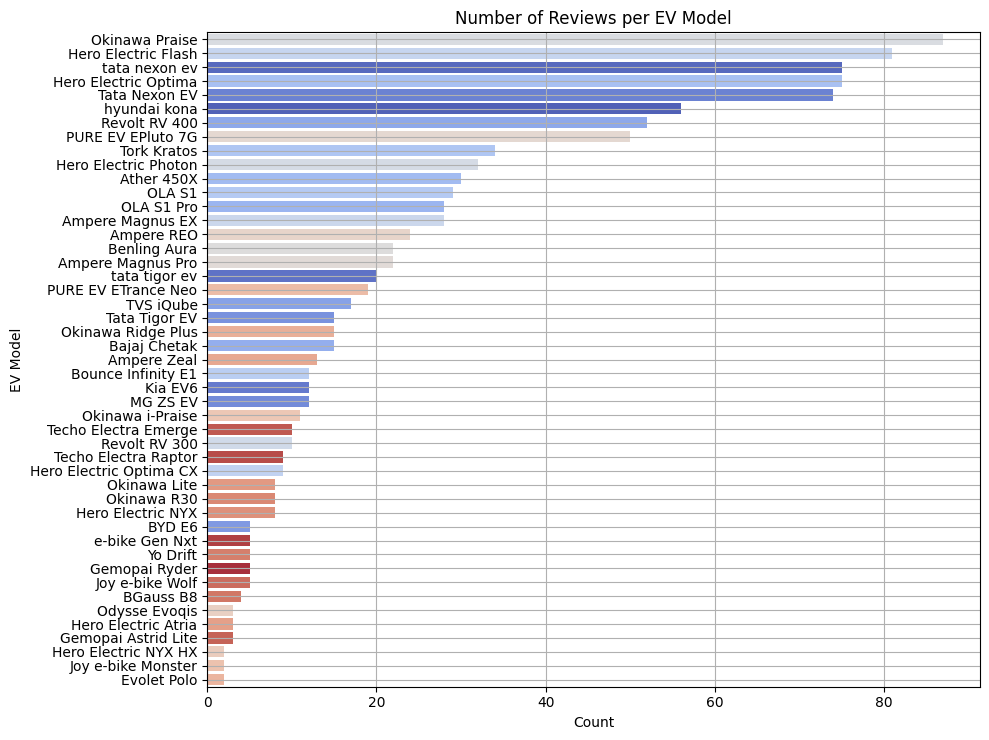

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
sns.countplot(y='Model', data=df_reviews, order=df_reviews['Model'].value_counts().index, hue='Model', palette="coolwarm", legend=False)
plt.title("Number of Reviews per EV Model")
plt.xlabel("Count")
plt.ylabel("EV Model")
plt.grid(True)
plt.tight_layout()
plt.show()


 Regions in dataset: 38
 Powertrain types: ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']

 Data range: 2010 to 2030


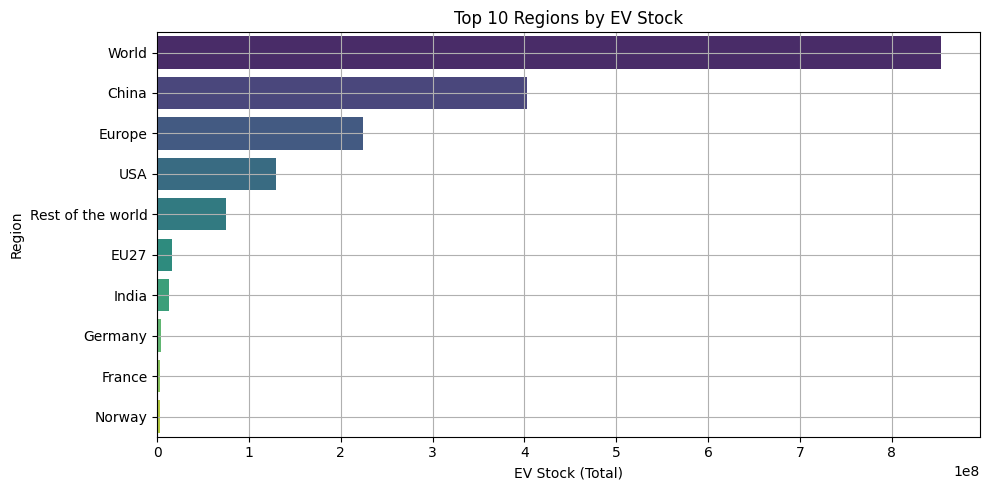

In [49]:

print("\n Regions in dataset:", df_market['region'].nunique())
print(" Powertrain types:", df_market['powertrain'].unique())


print("\n Data range:", df_market['year'].min(), "to", df_market['year'].max())


stock = df_market[(df_market['parameter'] == 'EV stock') & (df_market['unit'] == 'Vehicles')]
top_regions = stock.groupby('region')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_regions.values, y=top_regions.index, hue=top_regions.index, palette='viridis')
plt.title("Top 10 Regions by EV Stock")
plt.xlabel("EV Stock (Total)")
plt.ylabel("Region")
plt.grid(True)
plt.tight_layout()
plt.show()



 IEA dataset coverage:
Regions: 61
Parameters: ['EV sales' 'EV stock' 'EV sales share' 'EV stock share'
 'Oil displacement Mbd' 'Oil displacement, million lge' 'Battery demand']
Years: 2010 - 2024


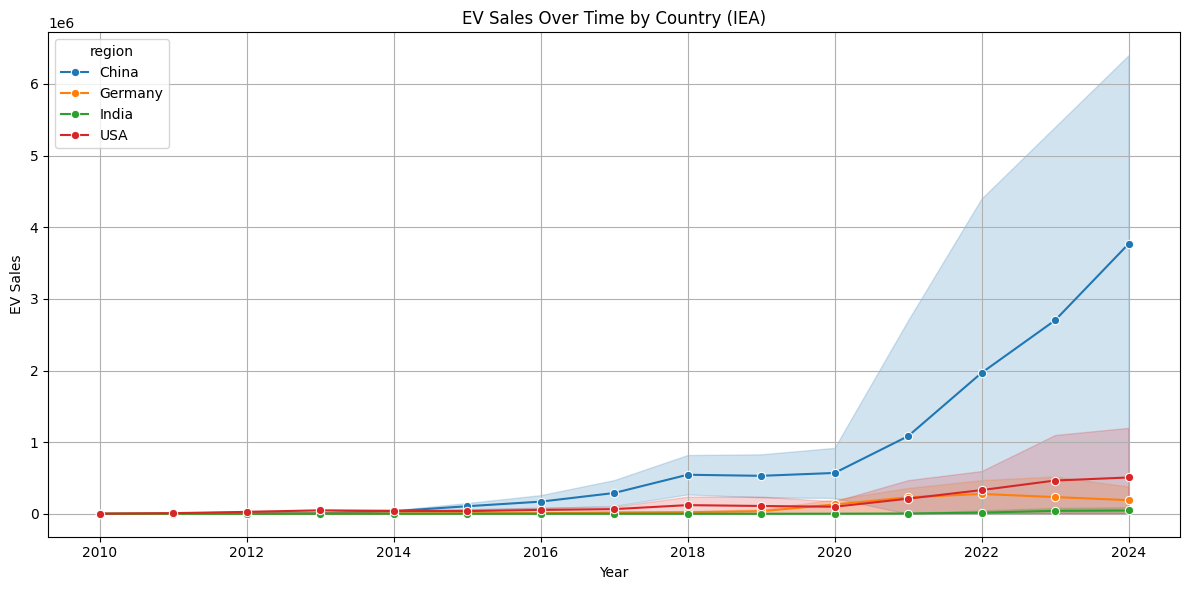

In [50]:

print("\n IEA dataset coverage:")
print("Regions:", df_iea['region'].nunique())
print("Parameters:", df_iea['parameter'].unique())
print("Years:", df_iea['year'].min(), "-", df_iea['year'].max())


selected_countries = ['USA', 'China', 'India', 'Germany']
iea_ev_sales = df_iea[(df_iea['parameter'] == 'EV sales') & (df_iea['region'].isin(selected_countries))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=iea_ev_sales, x='year', y='value', hue='region', marker='o')
plt.title("EV Sales Over Time by Country (IEA)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return tokens


custom_stop_words = {"car", "vehicle", "drive", "driving", "model", "engine", 'tata', 'electric', 'ev',
                      'nexon', }
for word in custom_stop_words:
    nlp.vocab[word].is_stop = True

df_reviews["tokens"] = df_reviews["Review"].apply(preprocess)


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_reviews["Model_Label"] = le.fit_transform(df_reviews["Model"])
df_reviews.head()

,Review,Model,Review Length,tokens,Model_Label
0,Superb car like as fantastic as petroleum car....,hyundai kona,209,"[superb, like, fantastic, petroleum, speed, su...",44
1,"Anti national, worst service, worst customer c...",hyundai kona,183,"[anti, national, bad, service, bad, customer, ...",44
2,Super happy with it. The car is too good,hyundai kona,40,"[super, happy, good]",44
3,"Pretty good car, smooth as a glider fast car, ...",hyundai kona,202,"[pretty, good, smooth, glider, fast, instant, ...",44
4,Price difference between petrol and electronic...,hyundai kona,323,"[price, difference, petrol, electronic, convin...",44


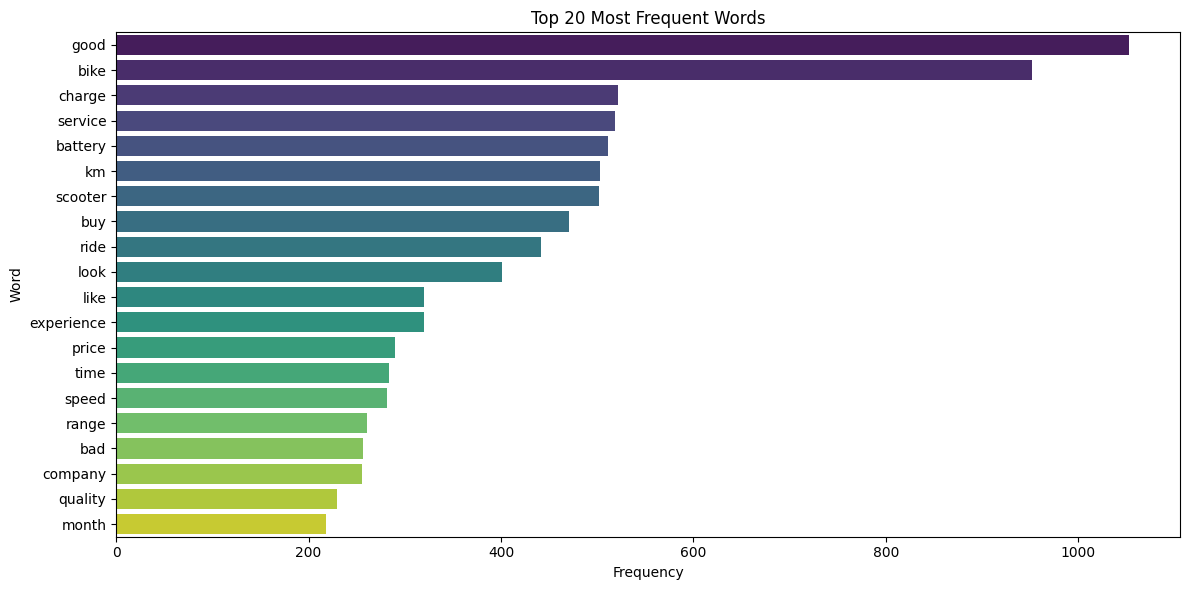

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

df_reviews["cleaned_review"] = df_reviews["tokens"].apply(lambda tokens: " ".join(tokens))
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_reviews["cleaned_review"])
y = df_reviews["Model_Label"]

word_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({
    "word": vocab,
    "frequency": word_counts,
}).sort_values(by="frequency", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x="frequency", y="word", data=word_freq_df, hue='word', palette="viridis")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

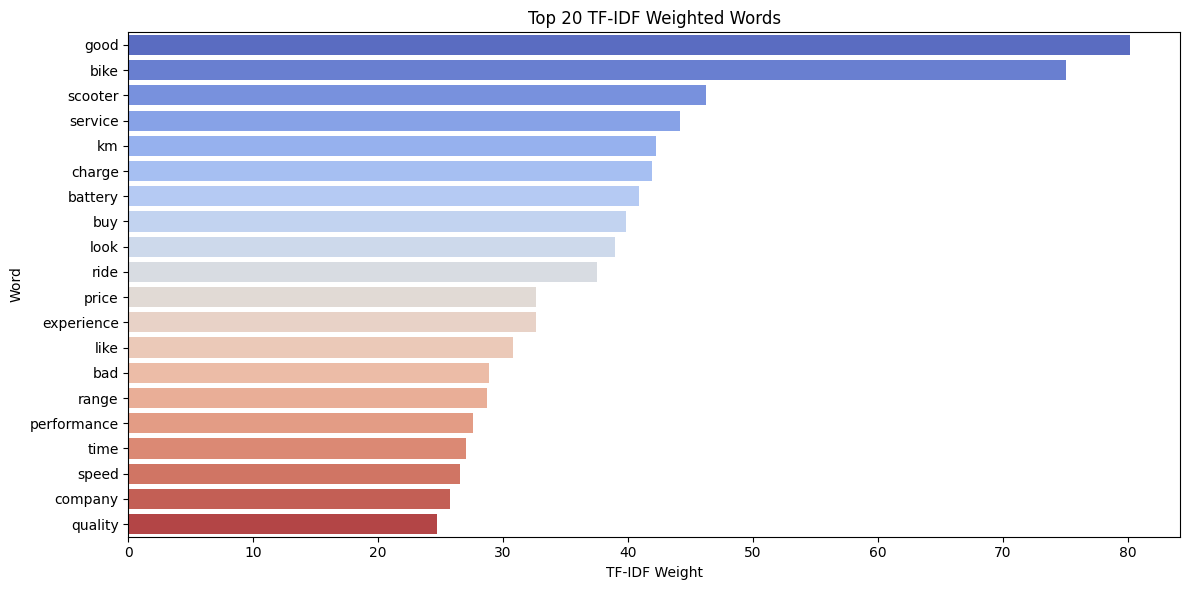

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df_reviews["cleaned_review"])

vocab = tfidf.get_feature_names_out()
weights = X_tfidf.toarray().sum(axis=0)

tfidf_df = pd.DataFrame({
    "word": vocab,
    "weight": weights
}).sort_values(by="weight", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x="weight", y="word", data=tfidf_df, hue='word', palette="coolwarm")
plt.title("Top 20 TF-IDF Weighted Words")
plt.xlabel("TF-IDF Weight")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [61]:
def extract_sentences(text):
    return [sent.text.strip() for sent in nlp(text).sents]

df_reviews["sentences"] = df_reviews["cleaned_review"].apply(extract_sentences)

sent_rows = []
for idx, row in df_reviews.iterrows():
    for sent in row["sentences"]:
        sent_rows.append({"sentence": sent, "model": row["Model"]})
sent_df = pd.DataFrame(sent_rows)
top_words = tfidf_df.head(20)["word"].tolist()
examples = []
for word in top_words:
    matched = sent_df[sent_df["sentence"].str.contains(rf"\b{word}\b", case=False, regex=True)]
    if not matched.empty:
        sentence = matched.iloc[0]["sentence"]
        model = matched.iloc[0]["model"]
        examples.append((word, sentence, model))
example_df = pd.DataFrame(examples, columns=["word", "Context", "model"])
print(example_df)

           word                                            Context  \
0          good                                   super happy good   
1          bike  check bike capacity km charge give hell want p...   
2       scooter  purchase april sale staff clueless new launch ...   
3       service  anti national bad service bad customer bad dea...   
4            km  price difference petrol electronic convince cu...   
5        charge  pretty good smooth glider fast instant pickup ...   
6       battery  amazing best performance battery backup cool l...   
7           buy  superb like fantastic petroleum speed superb b...   
8          look  superb like fantastic petroleum speed superb b...   
9          ride  pretty good smooth glider fast instant pickup ...   
10        price  anti national bad service bad customer bad dea...   
11   experience  good experience good experience performance go...   
12         like  superb like fantastic petroleum speed superb b...   
13          bad  ant

In [22]:
# Only run if afinn module is not installed already
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=e1d11afdaa4c830f20986a7aa9c77a6147f2d0deade36fef843866ebe99ea867
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


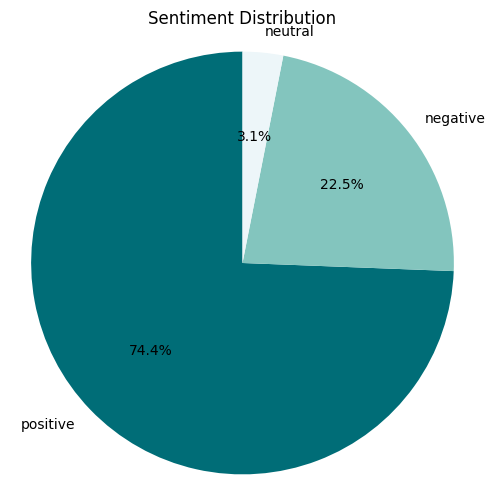

In [56]:
positive_keywords = [
    "love", "great", "excellent", "amazing", "smooth", "fast", "efficient", "comfortable",
    "quiet", "perfect", "reliable", "awesome", "best", "impressive", "enjoy"
]

negative_keywords = [
    "hate", "bad", "terrible", "worst", "slow", "loud", "uncomfortable", "broken",
    "problem", "issue", "disappointing", "expensive", "poor", "waste", "slow"
]

from afinn import Afinn

afn = Afinn()
scores = [afn.score(review) for review in df_reviews['Review']]
sentiments = ['positive' if score > 0
                else 'negative' if score < 0
                    else 'neutral'
                        for score in scores]

df_scores = pd.DataFrame()
df_scores['Review'] =  df_reviews['Review']
df_scores['Score'] = scores
df_scores['Sentiment'] = sentiments
df_scores

counts = df_scores["Sentiment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#006d77", "#83c5be", "#edf6f9"]
)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


In [59]:
# Only run if vaderSentiment module is not installed already
pip install vaderSentiment

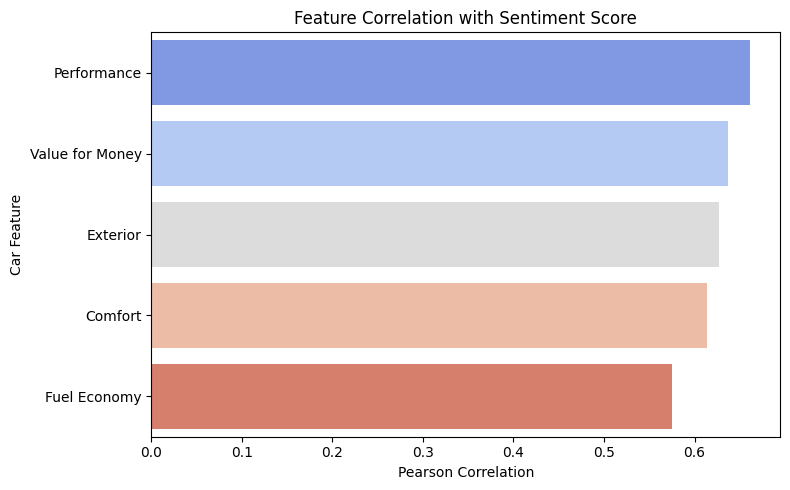

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df_carwale["Sentiment Score"] = df_carwale["Review"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
correlations = df_carwale[["Exterior", "Comfort", "Performance", "Fuel Economy", "Value for Money", "Sentiment Score"]].corr()
sentiment_corr = correlations["Sentiment Score"].drop("Sentiment Score")
sentiment_corr = sentiment_corr.sort_values(ascending=False)
sentiment_corr

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_corr.values, y=sentiment_corr.index, hue=sentiment_corr.index, palette="coolwarm")
plt.title("Feature Correlation with Sentiment Score")
plt.xlabel("Pearson Correlation")
plt.ylabel("Car Feature")
plt.tight_layout()
plt.show()

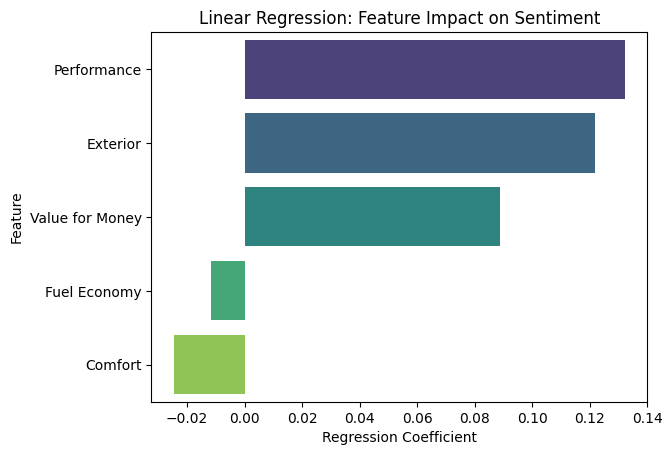

In [58]:
from sklearn.linear_model import LinearRegression

features = ["Exterior", "Comfort", "Performance", "Fuel Economy", "Value for Money"]
X = df_carwale[features]
y = df_carwale["Sentiment Score"]

model = LinearRegression()
model.fit(X, y)

importance = pd.Series(model.coef_, index=features).sort_values(ascending=False)

sns.barplot(x=importance.values, y=importance.index, hue=importance.index, palette="viridis")
plt.title("Linear Regression: Feature Impact on Sentiment")
plt.xlabel("Regression Coefficient")
plt.ylabel("Feature")
plt.show()
